# IBTrACS

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC

plot_defaults()

In [5]:
%matplotlib inline

In [3]:
ds = xr.open_dataset(IBTRACS_NC)

In [4]:
ds.storm.shape[0]

13612

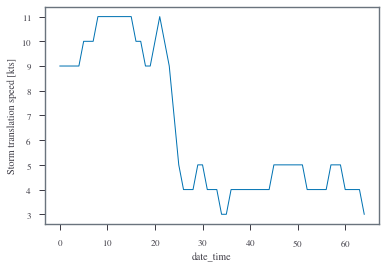

In [5]:
ds.storm_speed.isel(storm=0).plot()

In [6]:
ds

<xarray.Dataset>
Dimensions:           (storm: 13612, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [8]:
from src.plot.ibtracs import plot_na_tcs

plot_na_tcs()

'filter_by_labels'  0.75394 s 

'plot_all_storms'  37.79595 s 

'plot_na_tcs'  46.25033 s 



<Figure size 3307.09x2043.89 with 0 Axes>

'filter_by_labels'  0.72850 s 

<xarray.Dataset>
Dimensions:           (storm: 2262, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, 

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

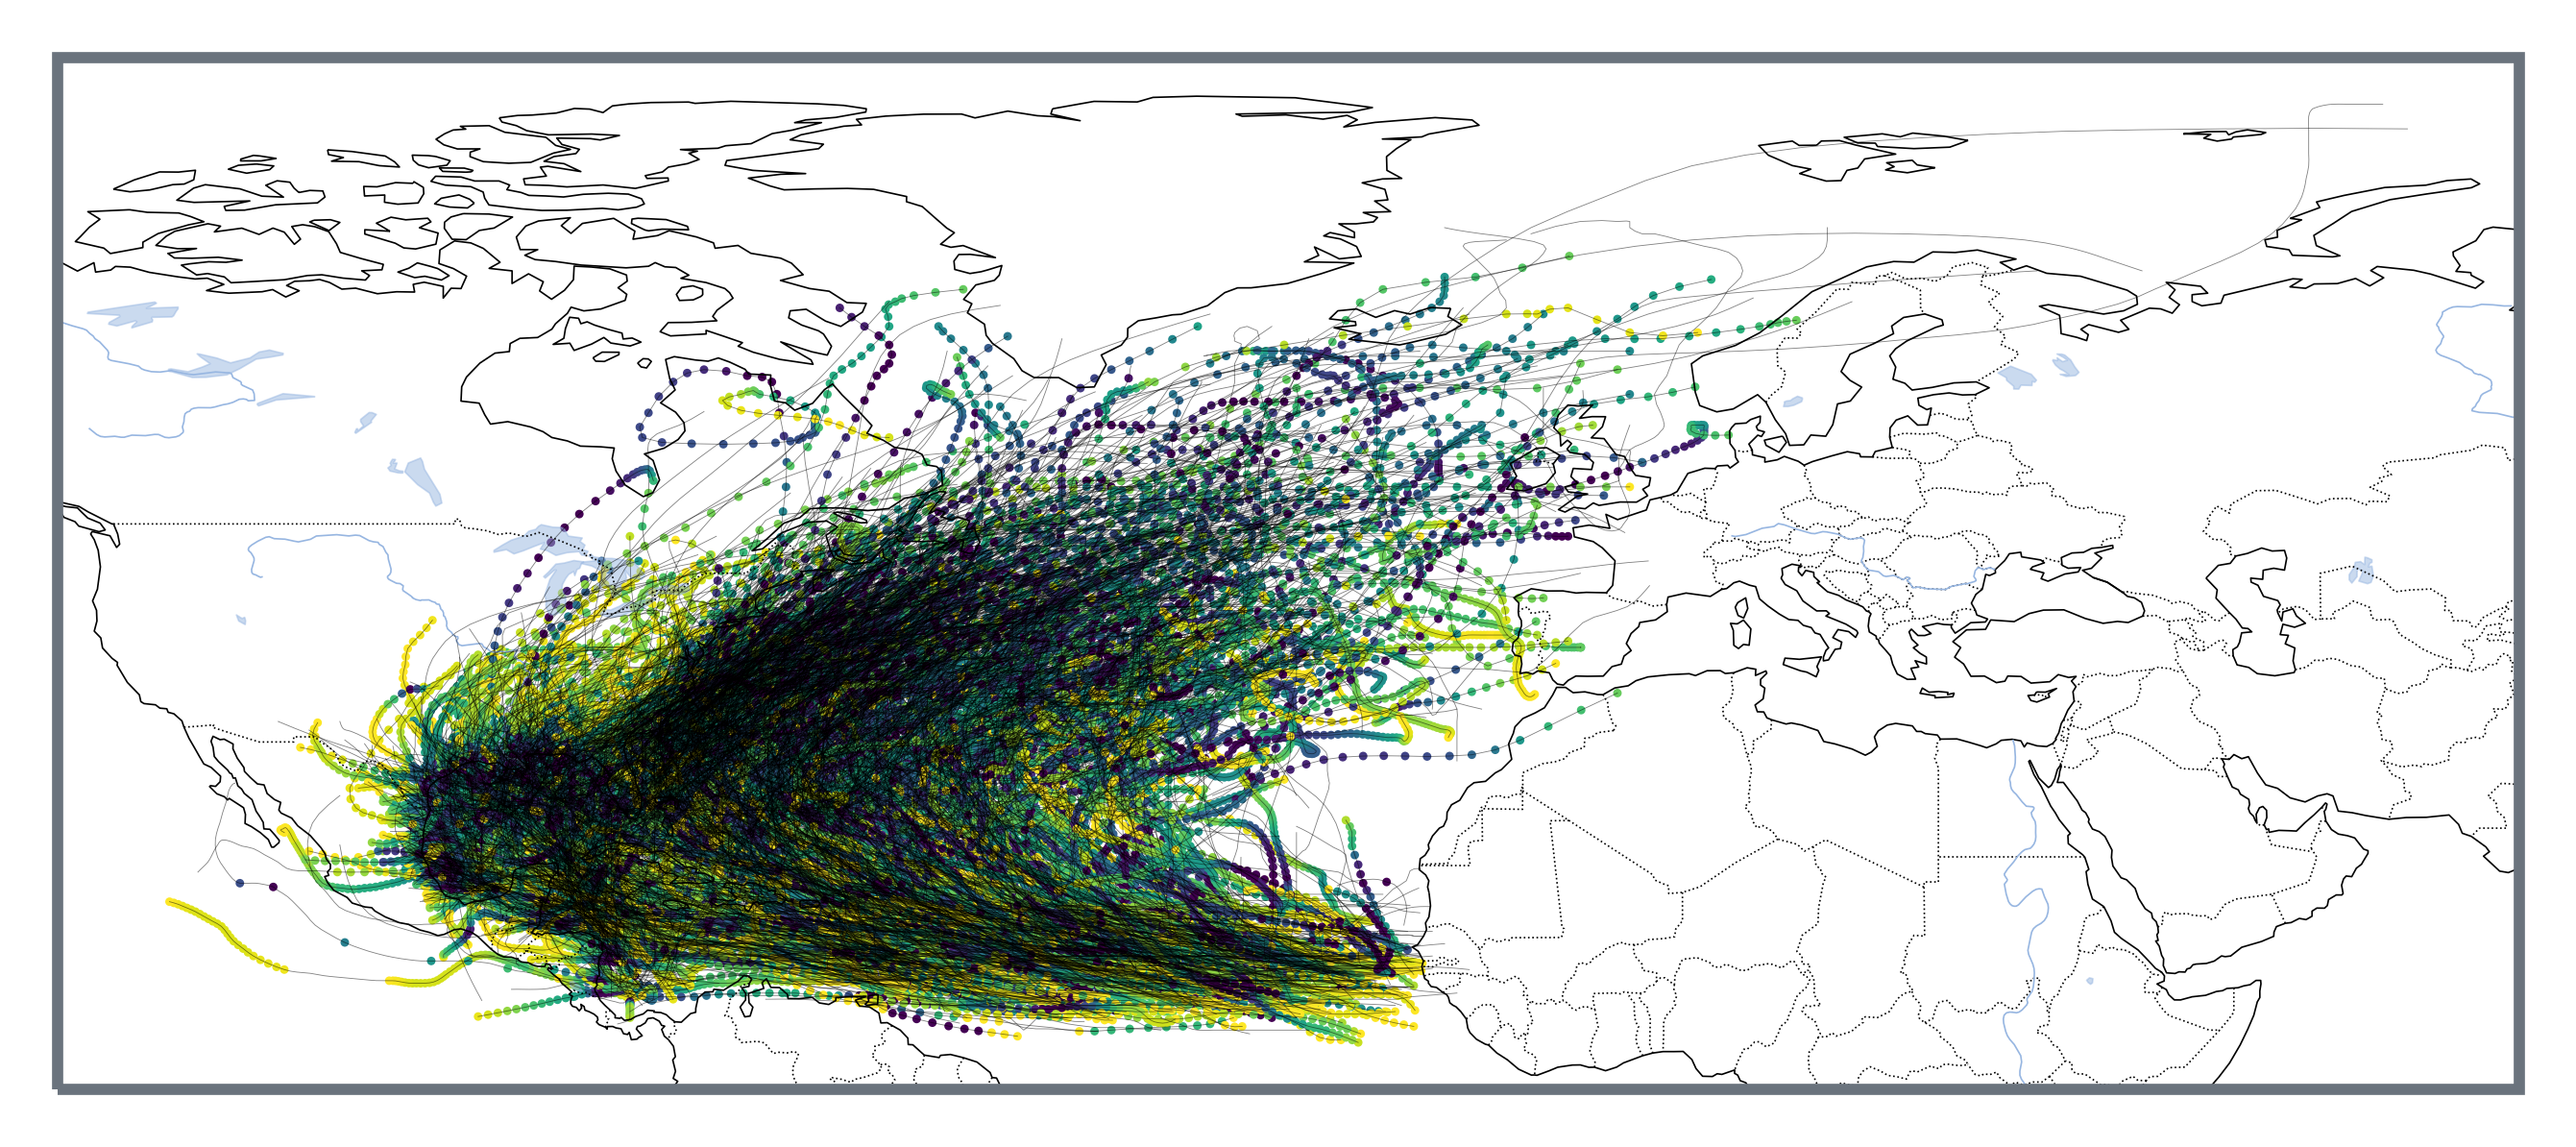

In [8]:
from src.plot.ibtracs import plot_na_tcs
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
from src.constants import NO_BBOX

plot_defaults(dpi=600)
plot_na_tcs(var="usa_pres", scatter_size=3)
ax = plt.gca()
NO_BBOX.ax_lim(ax)

In [ ]:
na = np.array([2, 1, 0])
ta = np.array([False, True, False])
na[ta]

In [ ]:
new_ds = filter_function(ds)
new_ds

In [ ]:
ds["basin"].isel(storm=slice(10, 20)) == b"NA"

In [ ]:
ds["basin"]

In [ ]:
for i in ds.storm:
    print(ds.sel(storm=i).name.values)

In [ ]:
ds.basin.plot()

In [ ]:
plot_units(ds)